In [1]:
#All cells combined take around 10 seconds to execute and generate all graphs
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(1)
# Importing the required packages and setting the seed

In [2]:
u_laplace = 2
u_gumbel = 1
b = 2
beta = 2
x0 = 0
gamma = 1
#defining the parameters

In [3]:
def pdf_plot(function, range_x, location, scale):
    x_axis = np.arange(-range_x, range_x, 0.01)
    y_axis = function(x_axis, location, scale)
    plt.plot(x_axis, y_axis)
    plt.ylabel("PDF values")
    plt.xlabel("Values of R.V.")
#generic pdf_plotting function

In [4]:
def laplace_pdf(x, u, b):
    var = np.exp(-1*abs(x-u)/b)/(2*b)
    return var

#source- https://en.wikipedia.org/wiki/Laplace_distribution#Probability_density_function

In [5]:
def gumbel_pdf(x, u, b):
    var = np.exp(-((x-u)/b+np.exp(-(x-u)/b)))/b
    return var

#source- https://en.wikipedia.org/wiki/Gumbel_distribution

In [6]:
def cauchy_pdf(x, x0, gamma):
    var = gamma/(np.pi*((x-x0)*(x-x0)+gamma*gamma))
    return var

#source- https://en.wikipedia.org/wiki/Cauchy_distribution#Probability_density_function

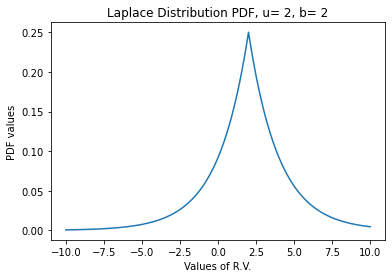

In [7]:
pdf_plot(laplace_pdf, 10, u_laplace, b)
plt.title("Laplace Distribution PDF, u= "+str(u_laplace)+", b= "+str(b))
plt.savefig("LaplacePDF.png", dpi=100)
plt.show()

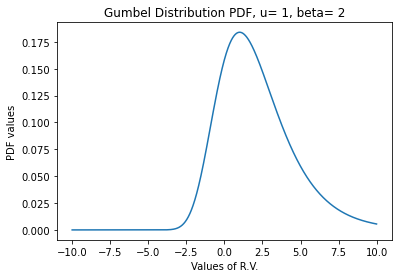

In [8]:
pdf_plot(gumbel_pdf, 10, u_gumbel, beta)
plt.title("Gumbel Distribution PDF, u= "+str(u_gumbel)+", beta= "+str(beta))
plt.savefig("GumbelPDF.png", dpi=100)
plt.show()

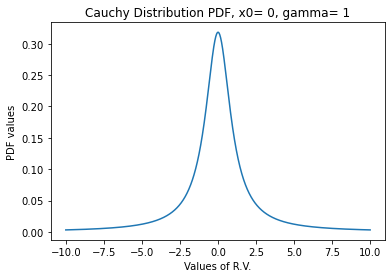

In [9]:
pdf_plot(cauchy_pdf, 10, x0, gamma)
plt.title("Cauchy Distribution PDF, x0= "+str(x0)+", gamma= "+str(gamma))
plt.savefig("CauchyPDF.png", dpi=100)
plt.show()

In [10]:
dx=0.001
#Width for Riemann Sum

In [11]:
def plot_cdf(f, y, x, u, b, dx):
    ans = []
    val=0
    infinity = u+100*b
    for i in np.linspace(-infinity, y, int(infinity/dx)):
        val+=f(i, u, b)*dx
    for i in np.linspace(y, x, int((x-y)/dx)):
        val+=f(i, u, b)*dx
        ans.append(val)
#     print(ans)
    plt.plot(np.linspace(y, x, int((x-y)/dx)), ans)
    plt.ylabel("CDF")
    plt.xlabel("Value of R.V.")
#     plt.show()

#Generic CDF Plotting Function

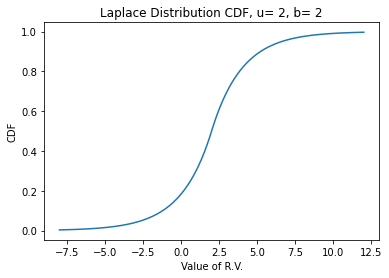

In [12]:
plot_cdf(laplace_pdf, u_laplace-5*b, u_laplace+5*b, u_laplace, b, dx)
plt.title("Laplace Distribution CDF, u= "+str(u_laplace)+", b= "+str(b))
plt.savefig("LaplaceCDF.png", dpi=100)
plt.show()

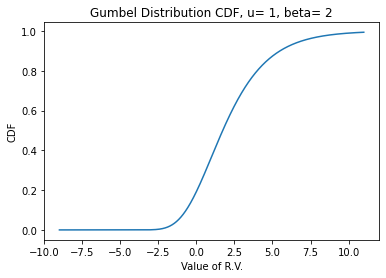

In [13]:
plot_cdf(gumbel_pdf, u_gumbel-5*beta, u_gumbel+5*beta, u_gumbel, beta, dx)
plt.title("Gumbel Distribution CDF, u= "+str(u_gumbel)+", beta= "+str(beta))
plt.savefig("GumbelCDF.png", dpi=100)
plt.show()

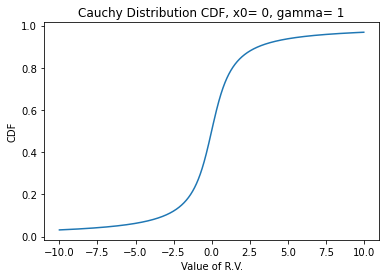

In [14]:
plot_cdf(cauchy_pdf, x0-10*gamma, x0+10*gamma, x0, gamma, dx)
plt.title("Cauchy Distribution CDF, x0= "+str(x0)+", gamma= "+str(gamma))
plt.savefig("CauchyCDF.png", dpi=100)
plt.show()

In [15]:
def compute_variance(f, u, b, dx):
    val=0
    prop=0
    infinity = u+100*b
    neg_infinity = u-100*b
    for i in np.linspace(neg_infinity, infinity, int((infinity-neg_infinity)/dx)):
        val+=f(i, u, b)*dx*(i-u)*(i-u)
        prop+=f(i, u, b)*dx
#     print(prop)
    return val

In [16]:
approx_variance_laplace = compute_variance(laplace_pdf, u_laplace, b, dx)
approx_variance_laplace

7.999979999999187

In [17]:
variance_laplace = 2*b*b
variance_laplace

8

In [18]:
Error =  variance_laplace - approx_variance_laplace
Error
#Very Small Magnitude of error, of the order 10^-5

2.0000000812814278e-05

In [19]:
#Special function since gumbel doesn't follow have mean as u. Here Scale depends on the scale parameter as well, alongwith the Eualer-Mascheroni Constant
def compute_variance_gumbel(f, u, b, dx):
    val=0
    prop=0
    #Mean is k. PDF defined in terms of u.
    
    k=u+b*0.57721566490153286060
    infinity = u+100*b
    neg_infinity = u-100*b
    for i in np.linspace(neg_infinity, infinity, int((infinity-neg_infinity)/dx)):
        val+=f(i, u, b)*dx*(i-k)*(i-k)
        prop+=f(i, u, b)*dx

    return val

In [20]:
approx_variance_gumbel = compute_variance_gumbel(gumbel_pdf,u_gumbel, beta, dx)
approx_variance_gumbel

6.579719818051592

In [21]:
variance_gumbel =  (np.pi)*(np.pi)*beta*beta/6 
variance_gumbel

6.579736267392906

In [22]:
Error = variance_gumbel - approx_variance_gumbel
Error
#Very Small Magnitude of error, of the order 10^-5

1.6449341313951038e-05

In [23]:
#Cauchy Distribution does not have finite variance, thus not calculated

In [24]:
#End of Question 1